In [39]:
import importlib
import clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns

In [66]:
importlib.reload(clustering)
file_name = "data/dataset.csv"
clusterator = clustering.Clusterator(file_name=file_name)

# Host Clusterization

## Kmeans

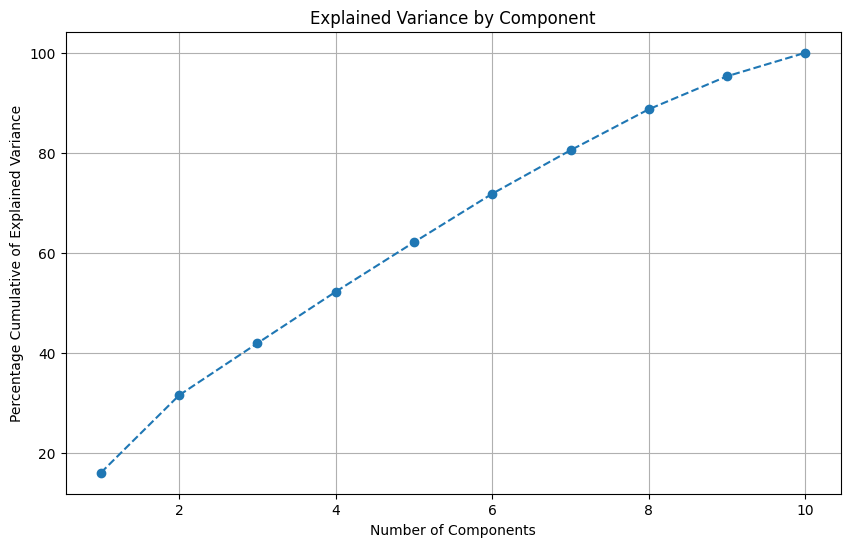

In [67]:
columns = ["price", "room_type", "minimum_nights", "reviews_per_month", "calculated_host_listings_count", "availability_365", "rating", "popularity", "beds", "baths"]
clusterator.plot_explainded_variance(columns)

Values of column price:
   cluster   min     max        mean
0        0  29.0  7590.0  259.086645
1        1  17.0  1173.0  134.421301
2        2  10.0   600.0   98.018595
3        3  31.0  1002.0  188.764706
4        4  20.0  9994.0  158.248894
Values of column room_type:
   cluster  min  max      mean
0        0    0    3  2.940795
1        1    0    3  2.265722
2        2    0    3  0.996389
3        3    1    3  2.129412
4        4    0    3  2.004021
Values of column minimum_nights:
   cluster  min   max        mean
0        0    1   182   25.913085
1        1    1   150   27.629589
2        2    1   125   24.388879
3        3  200  1250  446.894118
4        4    1   186   30.506836
Values of column reviews_per_month:
   cluster   min    max      mean
0        0  0.01  24.44  1.635580
1        1  0.01  10.79  0.346074
2        2  0.03  75.49  2.037546
3        3  0.01   4.45  0.608941
4        4  0.01   3.16  0.345376
Values of column calculated_host_listings_count:
   cluster  mi

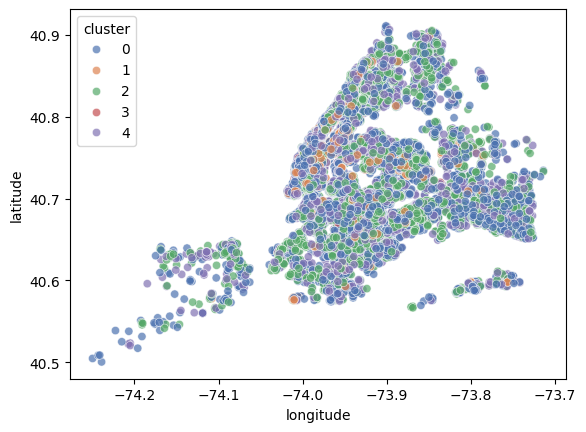

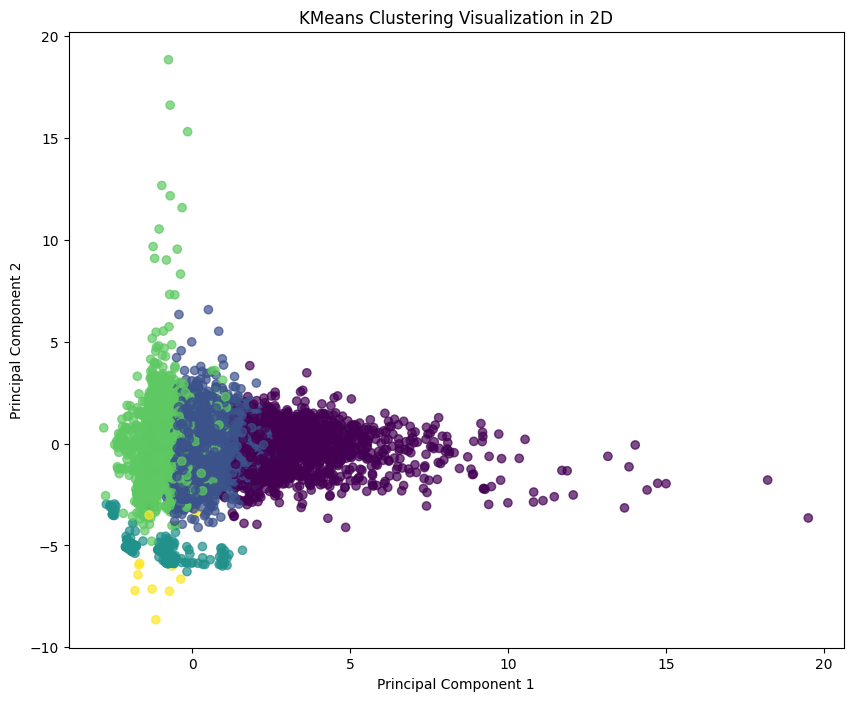

In [68]:
model = KMeans(n_clusters=5)
clusterator.clusterize(columns=columns, model=model)
clusterator.plot(show_values=columns)
clusterator.pca_plot(model = model, n_components=7, columns=columns)

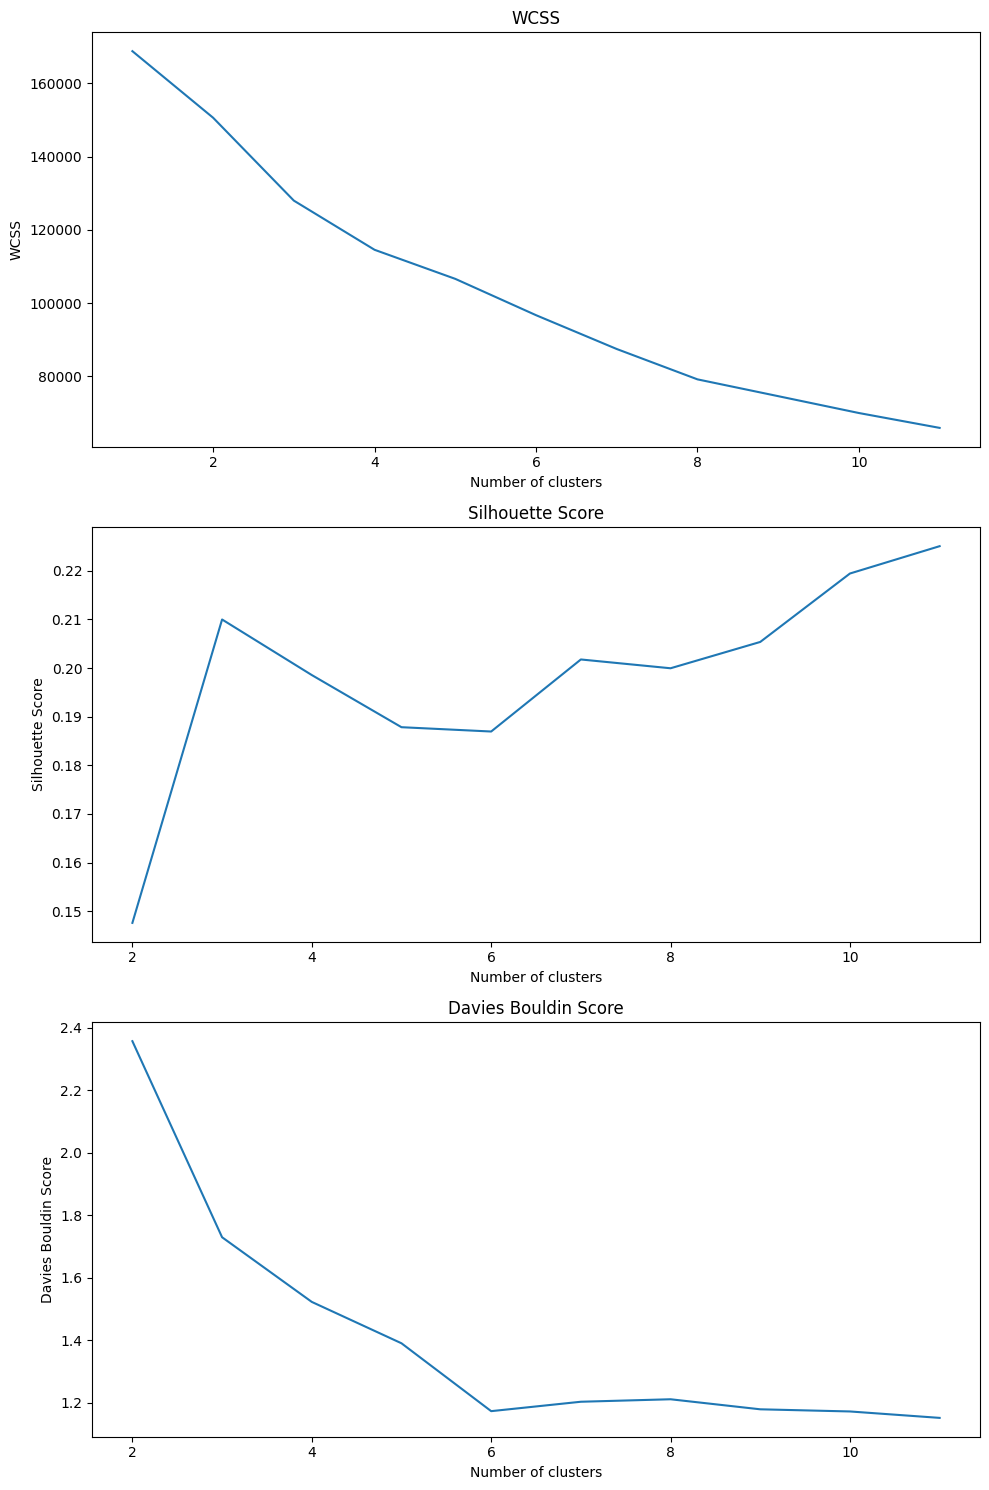

In [69]:
clusterator.plot_metric_scores(n_components=7, columns=columns)

Values of column price:
   cluster   min     max        mean
0        0  17.0  1173.0  134.441960
1        1  29.0  7590.0  259.163172
2        2  10.0   600.0   97.868896
3        3  20.0  9994.0  158.916922


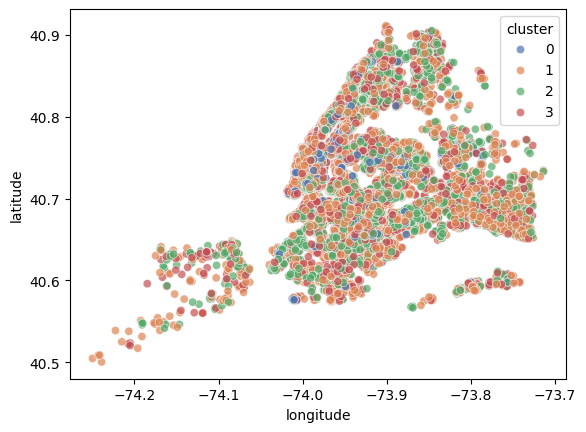

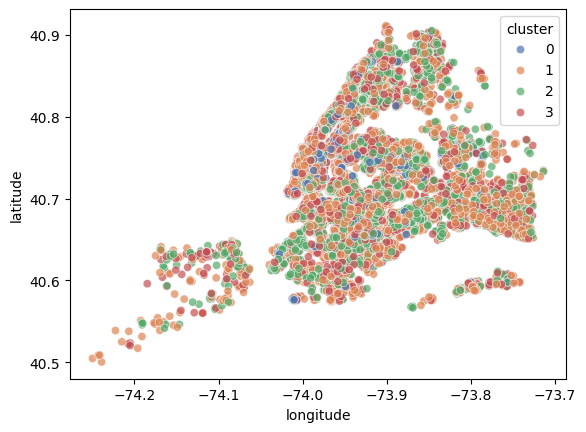

In [70]:
model = KMeans(n_clusters=4)
clusterator.clusterize(columns=columns, model=model)
clusterator.plot(show_values="price")

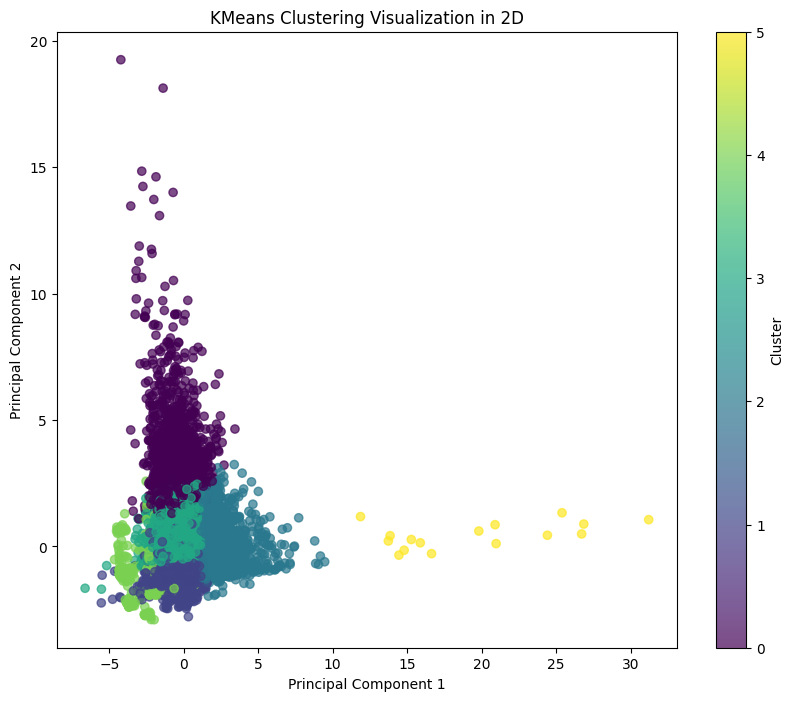

In [56]:
clusterator.pca_plot(model = model, n_components=7, columns=columns)

c:\Users\barte\OneDrive\Pulpit\studia\SEM4\ML\ML_p2\ML-2projekcik\km3\clustering.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pca = PCA(n_components=n_components)


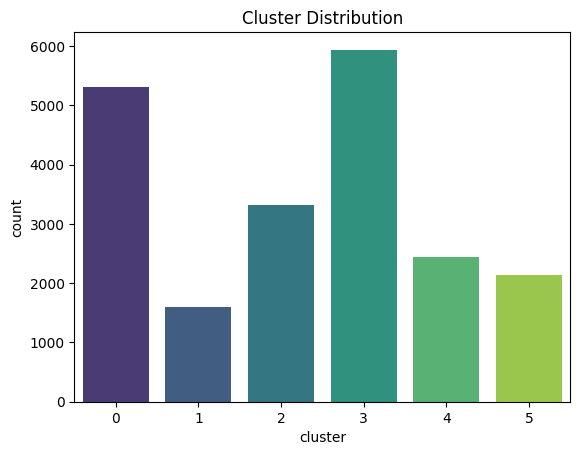

In [57]:
clusterator.plot_cluster_distribution()

## DBSCAN

Values of column price:
    cluster    min     max        mean
0        -1   10.0  9994.0  245.382040
1         0   39.0  1000.0  159.779001
2         1   19.0   500.0   87.145963
3         2  158.0   205.0  177.818182
4         3   29.0    75.0   38.400000
5         4   46.0   237.0  115.593434
6         5   25.0    73.0   38.014493
7         6   35.0    84.0   52.281690
8         7  193.0   466.0  267.937500
9         8   83.0   196.0  123.000000
10        9   36.0   125.0   58.833333


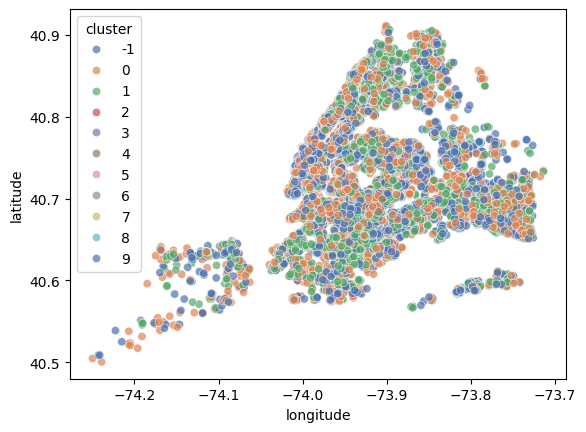

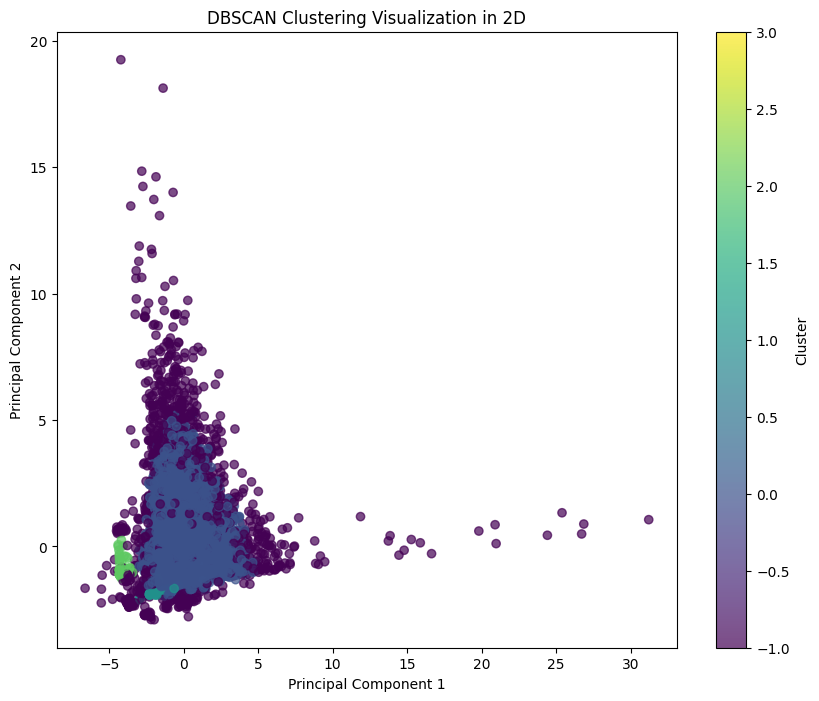

In [58]:
model = DBSCAN(eps=1, min_samples=19)
clusterator.clusterize(columns=columns, model=model)
clusterator.plot(show_values="price")
clusterator.pca_plot(model = model, n_components=7, columns=columns)


c:\Users\barte\OneDrive\Pulpit\studia\SEM4\ML\ML_p2\ML-2projekcik\km3\clustering.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pca = PCA(n_components=n_components)


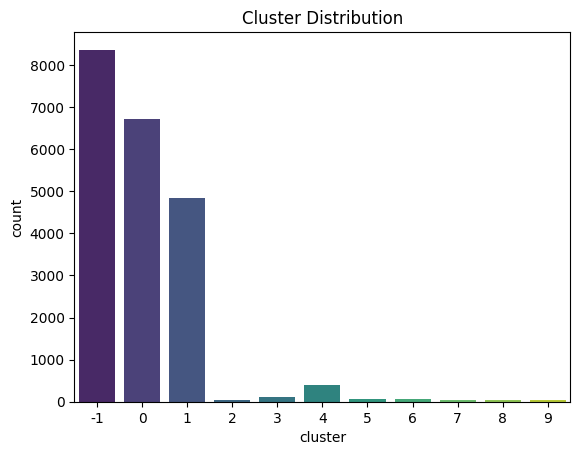

In [59]:
clusterator.plot_cluster_distribution()

## AgglomerativeClustering

Values of column price:
   cluster   min     max        mean
0        0  20.0  9994.0  183.116658
1        1  10.0  1495.0  149.119234
2        2  10.0  2250.0  106.653927
3        3  31.0  1002.0  183.548780
4        4  60.0  7498.0  449.734132


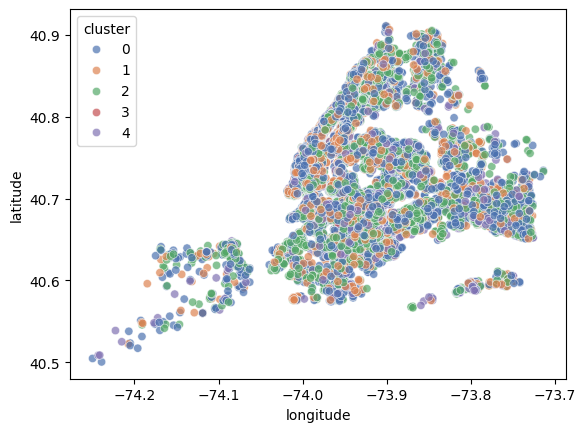

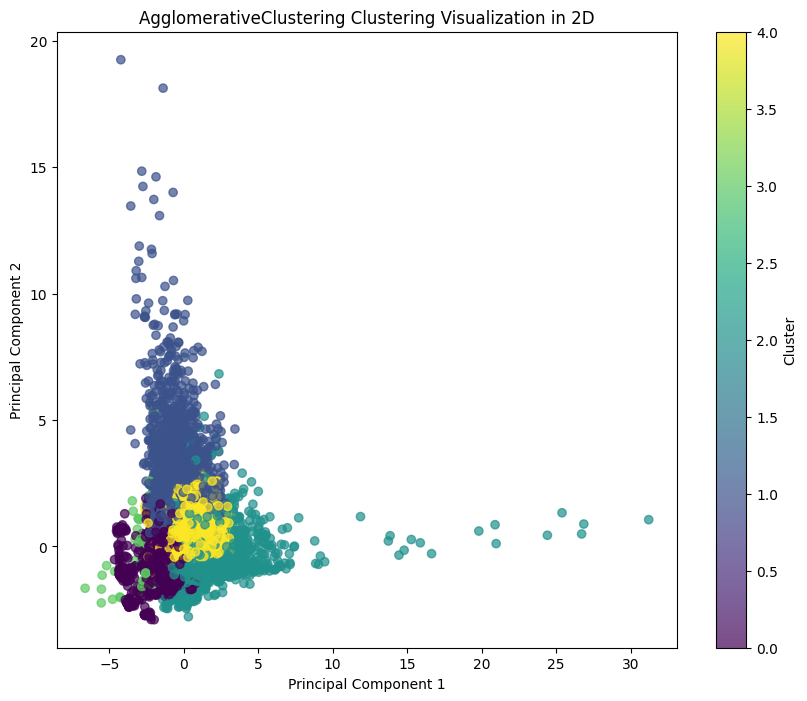

In [62]:
model = AgglomerativeClustering(n_clusters=5)
clusterator.clusterize(columns=columns, model=model)
clusterator.plot(show_values="price")
clusterator.pca_plot(model = model, n_components=7, columns=columns)


c:\Users\barte\OneDrive\Pulpit\studia\SEM4\ML\ML_p2\ML-2projekcik\km3\clustering.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pca = PCA(n_components=n_components)


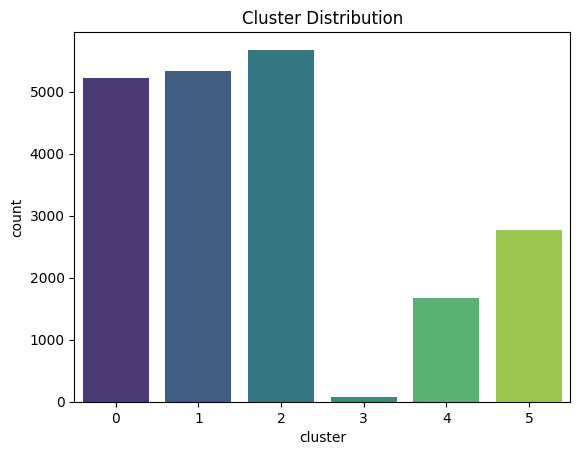

In [61]:
clusterator.plot_cluster_distribution()